<a href="https://colab.research.google.com/github/Vsevolod245/CV_MAI_2023/blob/main/HW2_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks.txt

Задание 1: работа с цветовым пространством HSV.
На практике познакомились с преимуществами использования пространства HSV. Если кратко, то с помощью этой модели легче описывать цвет, который мы хотим получить. Поскольку здесь мы оперируем понятиями H = Hue = оттенок, S = Saturation = насыщенность, V = Value = яркость.
Используя модель HSV попробуйте еще раз выполнить задание по превращению "starry_night" в "starry_day" (из дз №1)

Задание 2: На занятии мы разобрали несколько подходов для того, чтобы "размыть" изображение. Для этого мы использовали фильтры, представленные различными матрицами (ядрами). Вопрос - как нам решить обратную задачу? Т.е., имея размытое изображение, как сделать его более четким? Попробуйте подобрать матрицу, которая может это сделать.


---



In [6]:
import sys
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen
import numpy as np

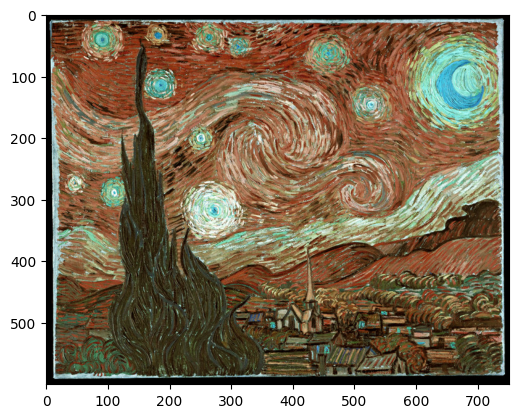

In [7]:
# загружаем картинку
req = urlopen('https://i.imgur.com/oFNSSJC.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_BGR = cv2.imdecode(arr, -1)
plt.imshow(img_BGR)



---


Задание 1

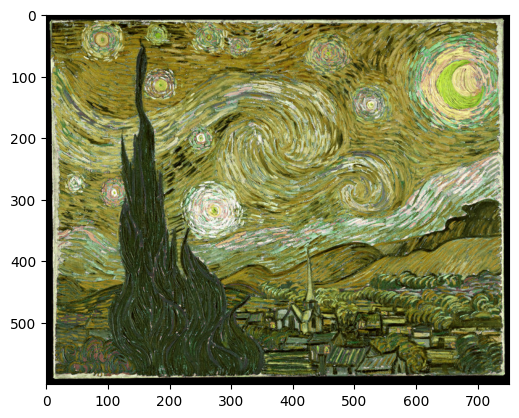

In [8]:
img_HSV = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2HSV)
# Крутим
H, S, V = cv2.split(img_HSV)
for i in range(0,H.shape[0]):
  H[i] = 317 - H[i]
img_Day = cv2.merge([H,S,V])
img_Day = cv2.cvtColor(img_Day, cv2.COLOR_HSV2RGB)
plt.imshow(img_Day)



---


Задание 2




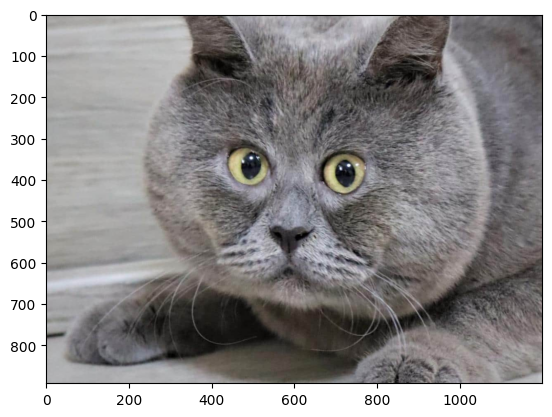

In [9]:
req = urlopen('https://dobrovserdce.ru/images/2022/11/02/kot%20Fedya_large.jpeg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_BGR = cv2.imdecode(arr, -1)
img_RGB = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

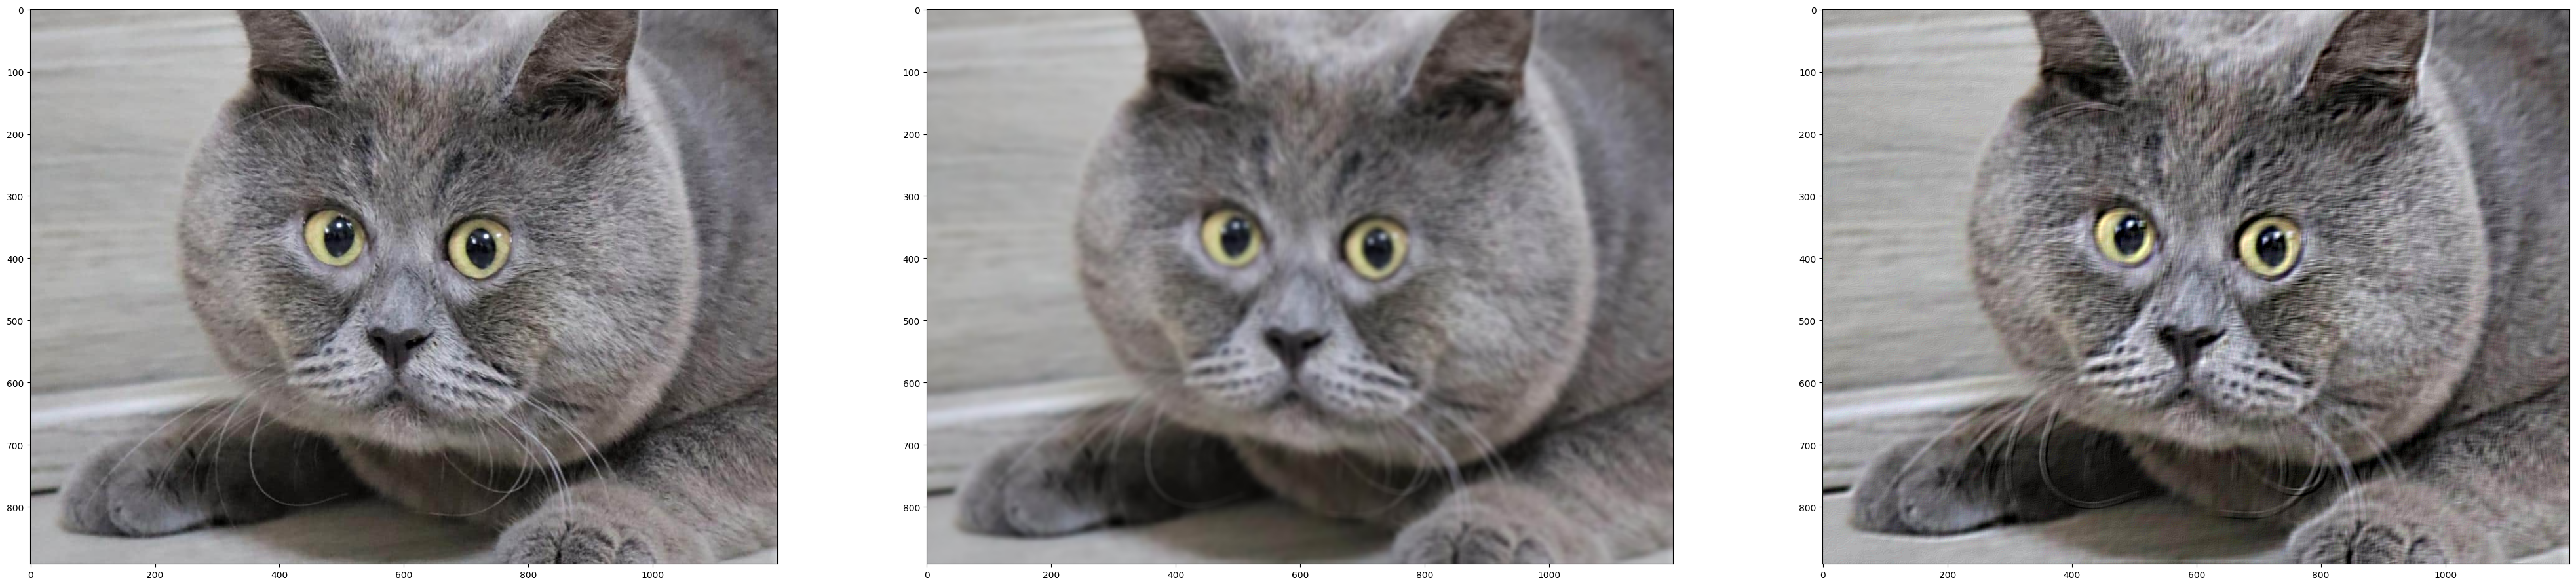

In [10]:
img_B = cv2.blur(img_RGB, (10, 10))
kernel = np.array([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]
])
img_S = cv2.filter2D(img_B, -1, kernel)
kernel = np.array([
  [-2, -1, 0],
  [-1, 1, 1],
  [0, 1, 2]
])
img_S = cv2.filter2D(img_S, -1, kernel)
plt.figure(figsize=(50, 50))
plt.subplot(1, 3, 1)
plt.imshow(img_RGB)
plt.subplot(1, 3, 2)
plt.imshow(img_B)
plt.subplot(1, 3, 3)
plt.imshow(img_S)